In [17]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [18]:
# Load the Iris dataset
digit_data = load_digits(return_X_y=False, as_frame=False)

# Now you can access the data, target, feature names, etc.
data = digit_data.data
target = digit_data.target
feature_names = digit_data.feature_names
target_names = digit_data.target_names

In [7]:
target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

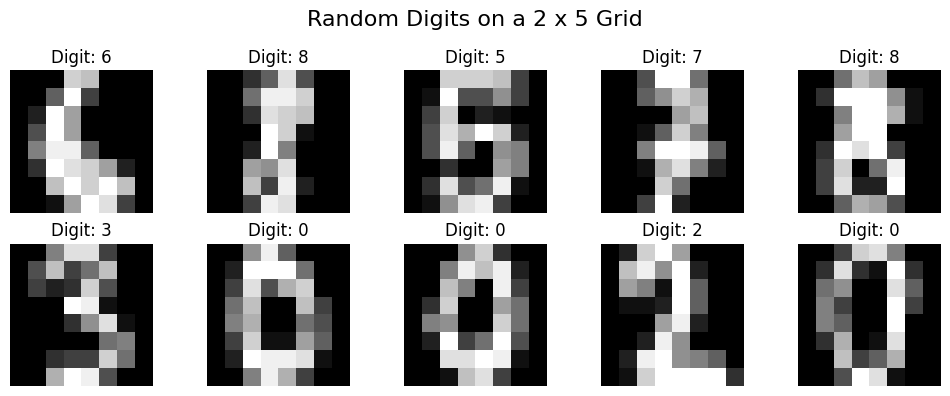

In [19]:
images = digit_data.images
# Select 10 random indices
random_indices = np.random.choice(len(images), size=10, replace=False)

# Create a 2 x 5 subplot
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

# Iterate through random indices and plot the digits
for i, ax in zip(random_indices, axes.flatten()):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f'Digit: {target[i]}')
    ax.axis('off')

# Set the title for the entire plot
fig.suptitle('Random Digits on a 2 x 5 Grid', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

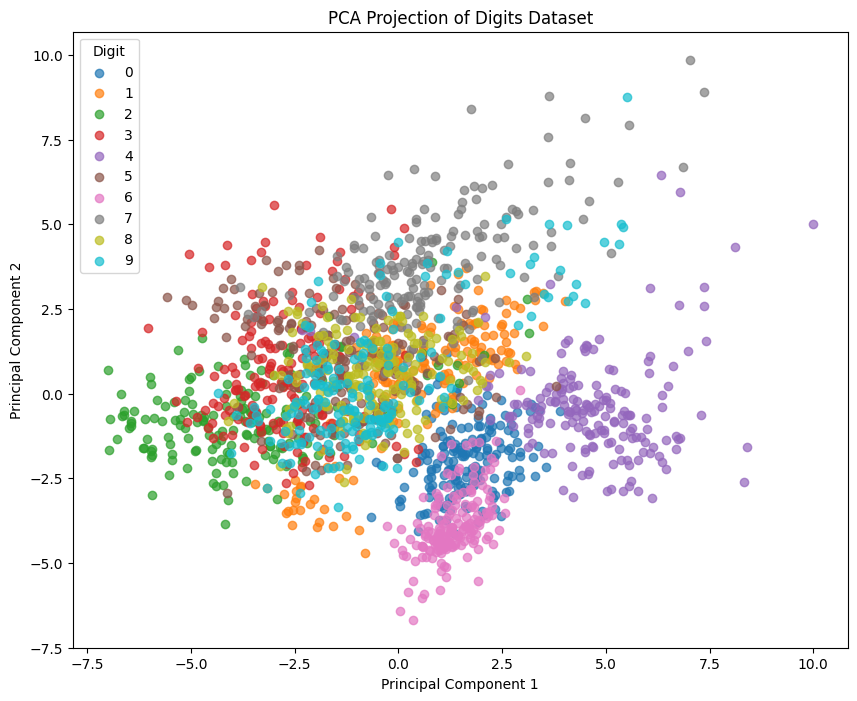

In [20]:
# Create an instance of PCA
pca = PCA(n_components=2)

# Apply scaling to the digit dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Train the PCA on the scaled digit dataset
pca.fit(scaled_data)

# Reduce the dimensionality of the digit dataset to 2 dimensions
pca_result = pca.transform(scaled_data)

# Plot the result in a scatter plot with each point colored by its digit label
plt.figure(figsize=(10, 8))
for digit in range(10):
    plt.scatter(
        pca_result[target == digit, 0],
        pca_result[target == digit, 1],
        label=str(digit),
        alpha=0.7
    )

plt.title('PCA Projection of Digits Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Digit')
plt.show()